# 📊 Módulo 3 – Análisis Exploratorio de Datos (EDA)

En este notebook exploraremos el dataset `salarios_pais.csv` con **Pandas**, **Matplotlib** y **Seaborn**.

## 🎯 Objetivos
- Comprender qué es el EDA y por qué es fundamental.
- Identificar patrones, tendencias y outliers.
- Usar el tipo de gráfico más adecuado según la pregunta.
- Comunicar hallazgos con visualizaciones claras.

## Recuerden la Estructura de un proyecto

Una estructura recomendada puede ser:
```
project-name/
├── assest/           # Imagenes, graficos (generalmente no se sube a github)
├── data/             # Datos crudos y procesados
    ├──── raw/   
    ├──── processed/   --> Datos limpios
├── notebooks/        # Notebooks del proyecto
├── utils/            # Funciones auxiliares
├── docs/             # Documentación
├── README.md         # Descripción general
├── environment.yml   # Dependencias usando conda
└── requirements.txt  # Dependencias usando pip

---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### 0.1 · Carga del dataset transformado
Asegúrate de que `salarios_pais.csv` se encuentra en la ruta `data/processed/`.


In [2]:
#ruta de la carpeta del proyecto --pydatapanama-cursos
PROJECT_DIR = Path("c:/Users/marie/Documents/Cursos/AnalisisDatosPYPA/pydatapanama-cursos")

#ruta al archivo salarios.csv
path_salarios_pais = PROJECT_DIR / "cursos" / "analisis_datos" / "data" / "processed" / "salarios_pais.csv"

print(f"Ruta completa: {path_salarios_pais}")
print(f"Existe el archivo: {path_salarios_pais.exists()}")

Ruta completa: c:\Users\marie\Documents\Cursos\AnalisisDatosPYPA\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
Existe el archivo: True


In [3]:
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8') #parametros explicitos
df_salarios_pais.head()

,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


---
## 1 · Revisión general
Antes de graficar, entendamos la estructura de los datos.


In [4]:
df_salarios_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nombre                   307 non-null    object 
 1   apellido                 307 non-null    object 
 2   edad                     307 non-null    int64  
 3   pais                     307 non-null    object 
 4   educacion_universitaria  307 non-null    object 
 5   nombre_de_la_empresa     307 non-null    object 
 6   cargo                    307 non-null    object 
 7   anos_en_la_empresa       307 non-null    int64  
 8   sueldo_anual_dolares     307 non-null    float64
 9   bono_anual_euros         307 non-null    float64
 10  bono_anual_dolares       307 non-null    float64
 11  capital                  307 non-null    object 
 12  cantidad_de_habitantes   307 non-null    float64
 13  PIB                      307 non-null    float64
 14  ingreso_per_capita       3

In [5]:
df_salarios_pais.describe()

,edad,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total
count,307.000000,307.000000,307.000000,307.000000,307.000000,3.070000e+02,3.070000e+02,307.000000,307.000000
mean,40.843648,6.459283,85825.452769,7961.742671,8757.916938,3.859265e+07,4.267248e+11,13355.387622,94583.369707
std,11.563479,3.990283,26254.494088,3975.691010,4373.260111,3.962670e+07,4.365595e+11,4380.175770,26830.552724
min,22.000000,0.000000,35364.000000,1069.000000,1175.900000,3.518552e+06,7.100000e+10,6611.000000,37164.700000
25%,30.000000,3.000000,64382.000000,4470.000000,4917.000000,5.150000e+06,8.650000e+10,9545.000000,73873.200000
50%,41.000000,6.000000,84204.000000,8139.000000,8952.900000,3.392585e+07,3.170000e+11,14120.000000,92059.100000
75%,51.000000,10.000000,100459.500000,11593.500000,12752.850000,5.187402e+07,6.410000e+11,16580.000000,109717.400000
max,60.000000,13.000000,155281.000000,14979.000000,16476.900000,1.260140e+08,1.410000e+12,20300.000000,167806.700000


nos menciona que esta version puede ser para cuando son más datos

In [5]:
df_salarios_pais.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
edad,307.0,4.084365e+01,1.156348e+01,2.200000e+01,3.000000e+01,4.100000e+01,5.100000e+01,6.000000e+01
anos_en_la_empresa,307.0,6.459283e+00,3.990283e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,1.300000e+01
sueldo_anual_dolares,307.0,8.582545e+04,2.625449e+04,3.536400e+04,6.438200e+04,8.420400e+04,1.004595e+05,1.552810e+05
bono_anual_euros,307.0,7.961743e+03,3.975691e+03,1.069000e+03,4.470000e+03,8.139000e+03,1.159350e+04,1.497900e+04
bono_anual_dolares,307.0,8.757917e+03,4.373260e+03,1.175900e+03,4.917000e+03,8.952900e+03,1.275285e+04,1.647690e+04
cantidad_de_habitantes,307.0,3.859265e+07,3.962670e+07,3.518552e+06,5.150000e+06,3.392585e+07,5.187402e+07,1.260140e+08
PIB,307.0,4.267248e+11,4.365595e+11,7.100000e+10,8.650000e+10,3.170000e+11,6.410000e+11,1.410000e+12
ingreso_per_capita,307.0,1.335539e+04,4.380176e+03,6.611000e+03,9.545000e+03,1.412000e+04,1.658000e+04,2.030000e+04
compensacion_total,307.0,9.458337e+04,2.683055e+04,3.716470e+04,7.387320e+04,9.205910e+04,1.097174e+05,1.678067e+05


nos menciona que esta version puede ser para cuando son porquitos datos

---
## 2 · Análisis Univariado (una variable)
### ¿Qué gráfico usar?
| Objetivo | Variable | Tipo de gráfico |
|----------|----------|-----------------|
| Distribución de valores | Numérica | **Histograma** (frecuencia) |
| Detección de outliers | Numérica | **Boxplot** / **Violinplot** |
| Frecuencia de categorías | Categórica | **Bar plot** |


### 📈 ¿Qué es el análisis univariado?

El **análisis univariado** examina **una sola variable** para entender su comportamiento sin considerar otras. Permite:

- Conocer **distribución** y **tendencia central** (media, mediana, moda).  
- Detectar **outliers** y asimetrías.  
- Resumir **dispersión** (rango, varianza, IQR).

Se usa al inicio de cualquier proyecto para obtener un panorama general de cada variable.  
**Gráficos típicos:** histograma, boxplot, barplot (si es categórica) y tablas de frecuencia.

### 2.1 · Histograma – `total_compensacion`
Los histogramas nos permiten ver la forma de la distribución (asimetría, valores extremos).

> **Explicación:**  
> Genera un **histograma** de la columna `compensacion_total` con 30 bins para ver la frecuencia de salarios y, además, dibuja una **curva KDE** (línea suave) que muestra la densidad estimada de la distribución. Luego agrega título y etiqueta del eje X antes de mostrar el gráfico.

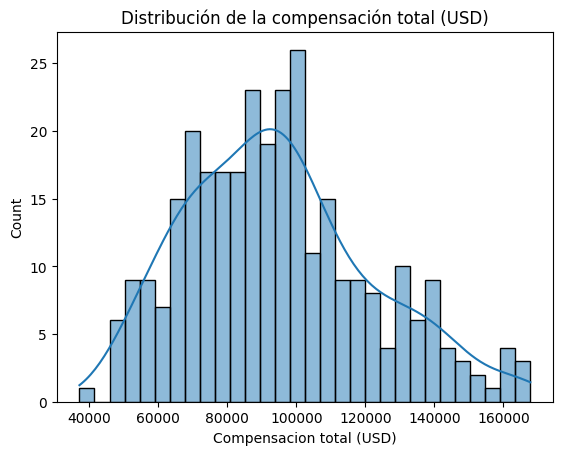

In [5]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Traza un histograma de la columna 'compensacion_total'.
# 2. Usa 30 bins para ver el detalle de la distribución
#    y activa la curva KDE (Kernel Density Estimate) para
#    superponer una línea suave que indique la densidad.
# 3. Añade un título y etiqueta del eje X para hacer
#    el gráfico auto-explicativo.
# 4. Llama a plt.show() para renderizarlo.

sns.histplot(data=df_salarios_pais, x='compensacion_total', bins=30, kde=True) 
plt.title('Distribución de la compensación total (USD)')
plt.xlabel('Compensacion total (USD)')
plt.show()

### 2.2 · Boxplot – Detectar outliers por cargo
Los **boxplots** resumen la mediana, el rango intercuartílico y muestran posibles valores atípicos.

**📦 ¿Cuándo usar un boxplot?**  
Utilízalo cuando necesites resumir la **distribución de una variable numérica** y:

* Comparar **múltiples grupos** (eje X categórico vs eje Y numérico).  
* Detectar **outliers** fácilmente (puntos fuera de los bigotes).  
* Visualizar la **mediana** y la **dispersión** (rango intercuartílico).  

Ideal para contraste rápido entre cargos, países, experimentos A/B, etc.

**🔍 Cómo leer un boxplot**

- **Caja (Box)**  
  Delimita el **rango intercuartílico (IQR)**: del Q1 (25 %) al Q3 (75 %) de los datos.

- **Línea central**  
  Marca la **mediana (Q2 / 50 %)**: el valor que divide la distribución en dos mitades.

- **Extremos (“bigotes”)**  
  Se extienden hasta el valor más bajo y más alto **dentro de 1.5 × IQR**.  
  Puntos más allá se dibujan como **outliers** individuales.

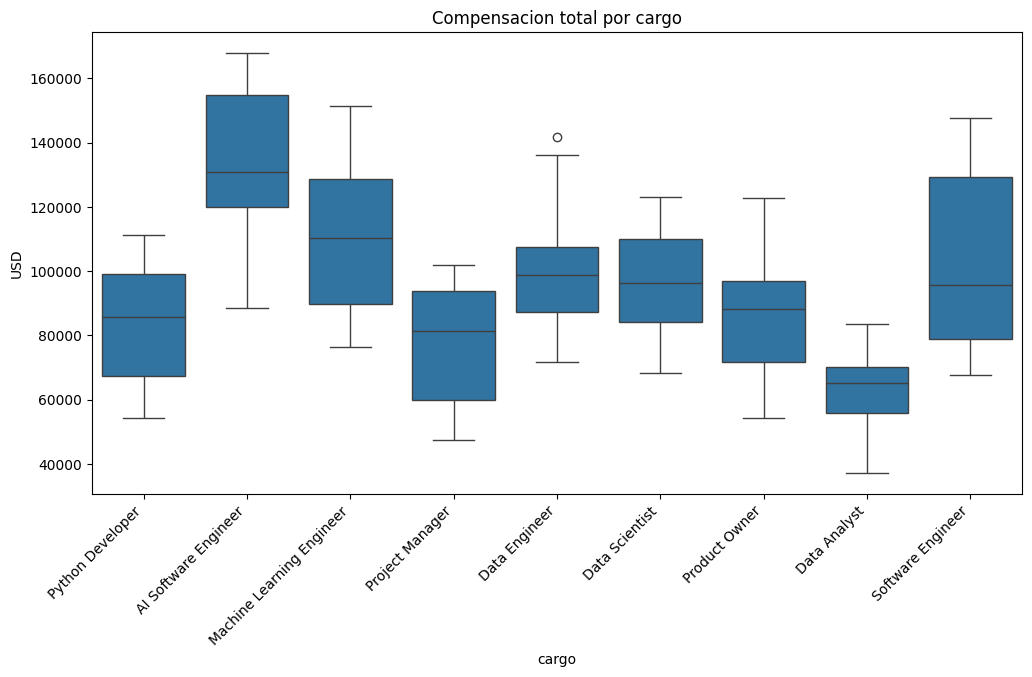

In [6]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Crea un boxplot que compare la ‘compensacion_total’ entre cargos.
# 2. Usa un canvas amplio (12×6) para que las etiquetas no se amontonen.
# 3. Rota los nombres de los cargos 45 ° y alinéalos a la derecha
#    para que queden legibles bajo cada boxplot.
# 4. Añade título y etiqueta del eje Y (USD).
# 5. Finaliza con plt.show() para visualizar el gráfico.
plt.figure(figsize=(12,6))
sns.boxplot(data=df_salarios_pais, x='cargo', y='compensacion_total')
plt.xticks(rotation = 45, ha='right')
plt.title('Compensacion total por cargo')
plt.ylabel('USD')
plt.show()


---
## 3 · Análisis Bivariado
Ahora buscamos **relaciones** entre dos variables.

| Objetivo | Var. 1 | Var. 2 | Gráfico sugerido |
|----------|--------|--------|------------------|
| Relación lineal | Numérica | Numérica | **Scatter** |
| Comparar distribuciones | Categórica | Numérica | **Box / Violin** |
| Media de grupos | Categórica | Numérica | **Barplot** (con `est=np.mean`) |


### 🔗 ¿Qué es el análisis bivariado?

El **análisis bivariado** estudia la **relación entre dos variables** a la vez (X vs Y).  
Se usa para responder preguntas como:

* ¿Existe correlación entre años de experiencia y salario?  
* ¿Cómo varía el ingreso promedio por país?  
* ¿La categoría A tiene mayor tasa de conversión que B?

Usa **scatterplots, box/violin plots, barplots o tablas de contingencia** según si las variables son numéricas o categóricas.  
Empléalo cuando quieras identificar patrones, dependencias o diferencias entre dos dimensiones clave de tu dataset.

### 3.1 · Scatter – `anos_en_la_empresa` vs. `total_compensacion`


### 🔵 ¿Qué es un *scatterplot*?

Un **scatterplot** (diagrama de dispersión) representa dos variables numéricas
mediante puntos en un plano cartesiano:

* **Eje X** → variable independiente  
* **Eje Y** → variable dependiente

Cada punto corresponde a una observación (fila).  
Permite visualizar la **relación** entre ambas variables y detectar patrones.

---

#### 🕒 ¿Cuándo usarlo?

| Objetivo | Ejemplo |
|----------|---------|
| **Correlación** (¿suben/junto o bajan?) | Años de experiencia vs salario |
| **Tendencia lineal / no lineal** | Temperatura vs consumo eléctrico |
| **Densidad de puntos** | Clientes vs compras en distintas horas |
| **Outliers** | Ventas atípicas en un mes específico |
| **Comparar grupos** <br>(con `hue`, `style`, `size`) | Senioridad coloreada por categoría |

> 🔑 Ideal cuando **ambas variables son cuantitativas** y deseas ver la forma
  de su relación antes de aplicar un modelo o cálculo estadístico.

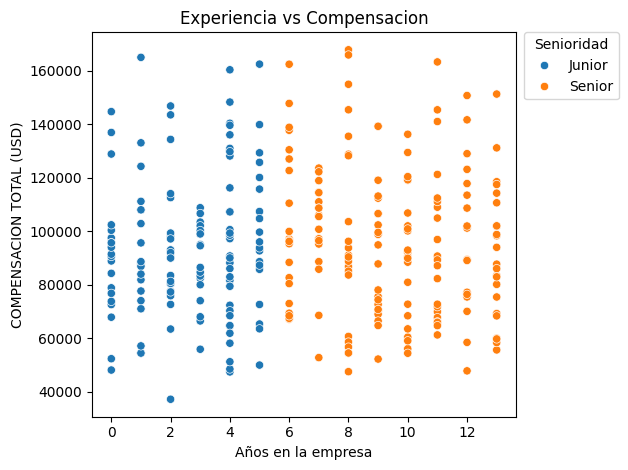

In [7]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Dibuja un scatterplot para analizar la relación entre:
#    - X: años en la empresa
#    - Y: compensación total
# 2. Colorea los puntos por nivel de 'senioridad' con el parámetro hue
#    para distinguir rápidamente Juniors y Seniors.
# 3. Coloca la leyenda fuera del área de datos usando bbox_to_anchor‐
#    (1.02,1) y loc='upper left', de modo que no tape ningún punto.
# 4. Añade título y etiquetas de ejes con unidades.
# 5. Aplica tight_layout() para ajustar los márgenes antes de mostrar.

ax = sns.scatterplot(       #por buenas practicas, cuando se tiene mas de un solo grafico esto es recomendable
                        data=df_salarios_pais,
                        x= "anos_en_la_empresa",
                        y="compensacion_total",
                        hue="senioridad"
)

plt.title('Experiencia vs Compensacion')
plt.ylabel('COMPENSACION TOTAL (USD)')
plt.xlabel('Años en la empresa')

plt.legend(
    title="Senioridad",
    bbox_to_anchor = (1.02,1), #posicion relativa del eje
    loc="upper left",
    borderaxespad=0
)
plt. tight_layout() #paddinf del canvas

plt.show()

### 3.2 · Barplot – Compensación media por país
`est=np.min` nos da el mínimo por grupo.

### 📊 ¿Qué muestra este barplot?

Cada barra representa la **compensación total mínima** (o el estadístico elegido con `estimator`, p. ej. `np.mean`, `np.min`, `np.max`) para un país.  
La altura indica el valor del estadístico y las líneas verticales (error bars) señalan la **incertidumbre**—por defecto, el intervalo de confianza del 95 % calculado por Seaborn.

---

#### 🕒 ¿Cuándo usar un *barplot*?

| Situación | Ejemplo |
|-----------|---------|
| **Comparar una métrica agregada** entre categorías discretas | Salario medio por país, ventas promedio por trimestre |
| **Visualizar mínimos / máximos** por grupo (usando `estimator=np.min` o `np.max`) | Mínimo tiempo de respuesta por equipo |
| Mostrar **tendencias claras y ordenadas** cuando los grupos no son demasiados y los valores se agregan de modo sencillo | Tasa de conversión por canal de marketing |



> Un barplot es apropiado cuando quieres una **comparación rápida y legible** de un estadístico (media, mediana, etc.) calculado a partir de muchas observaciones dentro de cada categoría.

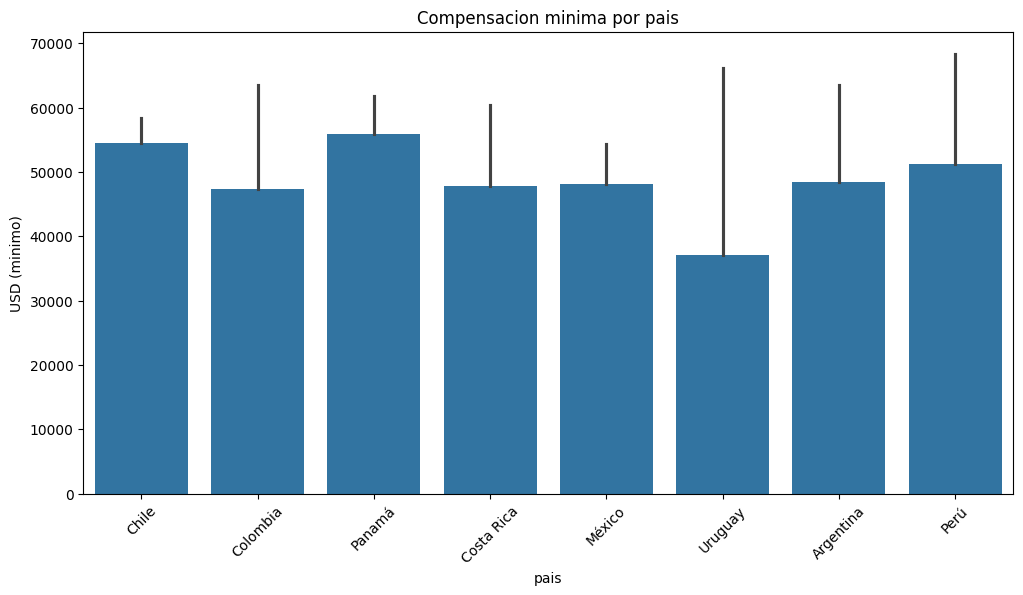

In [8]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Crea un barplot que muestre la **compensación mínima** por país
#    (usa estimator=np.min). Ideal para comparar pisos salariales.
# 2. Incluye barras de error con un intervalo de confianza del 95 %
#    mediante errorbar=('ci', 95).
# 3. Ajusta la figura a 12×6 y rota las etiquetas de los países 45 °
#    para que no se solapen.
# 4. Añade un título descriptivo y etiqueta del eje Y indicando que se
#    trata de valores mínimos en USD.
# 5. Finaliza con plt.show().

plt.figure(figsize=(12,6))
sns.barplot(data=df_salarios_pais, x='pais', y='compensacion_total', estimator=np.min, errorbar=('ci', 95))
plt.xticks(rotation = 45)
plt.title('Compensacion minima por pais')
plt.ylabel('USD (minimo)')
plt.show()


---
## 4 · Análisis de correlación
La matriz de correlación nos ayuda a detectar relaciones lineales entre variables numéricas. Un **heatmap** lo hace más visual.

### 🔥 ¿Cuándo usar una matriz de correlación y su heatmap?

| Herramienta | ¿Qué es? | ¿Cuándo te ayuda? |
|-------------|----------|-------------------|
| **Matriz de correlación (`df.corr()`)** | Tabla numérica que muestra la **fuerza y dirección** (−1 ⇢ 1) de la relación lineal entre pares de variables cuantitativas. | *Diagnóstico rápido* de:  <br>• **Multicolinealidad** antes de un modelo (variables muy correlacionadas inflan la varianza).<br>• Selección de *features*: descartar las que aportan información redundante.<br>• Descubrir relaciones inesperadas para hipótesis futuras. |
| **Heatmap de correlación (`sns.heatmap(corr)`)** | Representación visual en la que los valores de la matriz se codifican con una paleta de colores (rojo/azul, etc.). | *Comunicación e insight visual*: <br>• Detectar **patrones** y **bloques** de variables correlacionadas de un vistazo.<br>• Presentar hallazgos a personas no técnicas (más intuitivo que la tabla numérica).<br>• Focalizar la atención en correlaciones fuertes o anómalas. |

💡 **Recomendado** al inicio del EDA, justo después de limpiar y convertir a numérico, para orientar qué variables explorar más a fondo y evitar sorpresas al modelar.

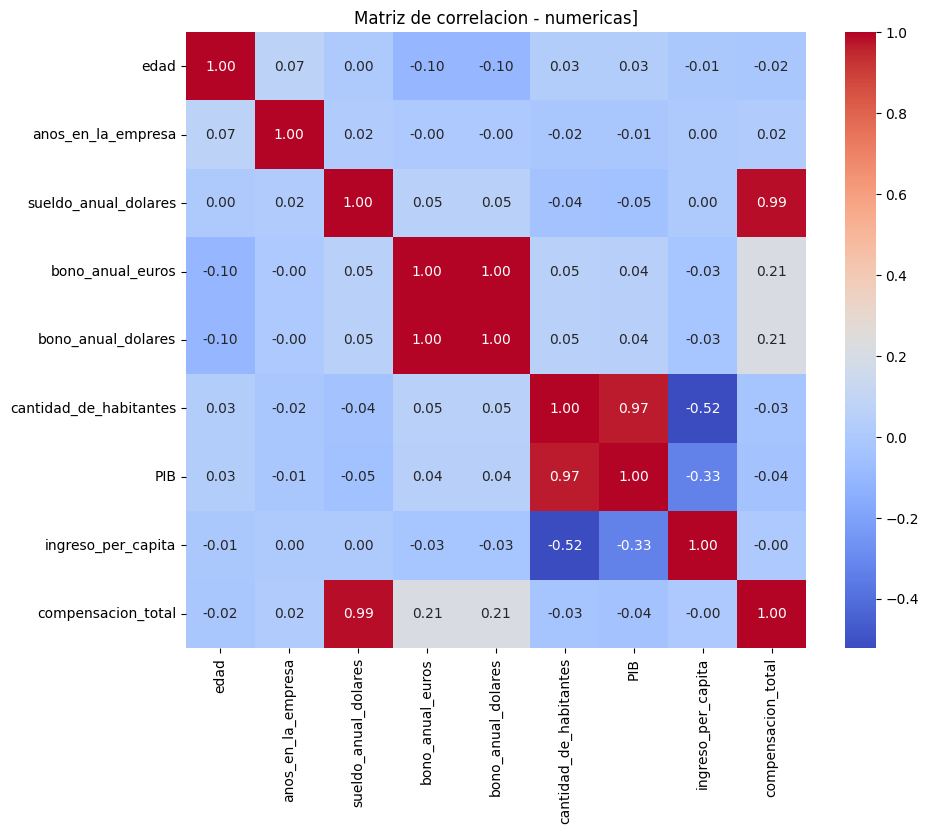

In [9]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Selecciona sólo las columnas numéricas con `select_dtypes`.
# 2. Calcula la matriz de correlación (`corr()`) para ver qué tan
#    relacionadas están las variables entre sí (−1 a 1).
# 3. Dibuja un heatmap con:
#    • `annot=True`   → escribe el valor numérico en cada celda.
#    • `cmap='coolwarm'` → paleta rojo–azul que resalta positivos y negativos.
#    • `fmt='.2f'`    → muestra los números con 2 decimales.
# 4. Ajusta la figura a 10×8 y añade un título descriptivo.
# 5. Llama a plt.show() para visualizar la matriz de correlación.

num_cols = df_salarios_pais.select_dtypes(include='number')
corr_matrix = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f') #redondearle los decimales a solo 2
plt.title('Matriz de correlacion - numericas]')
plt.show()

> **Interpretación rápida:** Valores cercanos a 1 o -1 indican correlación fuerte. Aquí podemos investigar por qué ciertas variables están altamente correlacionadas y si es lógico según el negocio.

---
## 5 · Pairplot rápido (opcional, pesado en datasets grandes)
Muestra todas las combinaciones numéricas en una sola figura. Útil para detectar relaciones de forma rápida.

### 🔄 ¿Cuándo usar un *pairplot*?

Un **pairplot** (Seaborn `sns.pairplot`) genera, en una sola figura, todas las combinaciones posibles de **gráficos bivariados** entre un conjunto de variables numéricas, junto con sus distribuciones univariadas en la diagonal.

#### 🕑 Cuándo es útil

| Escenario | Por qué te ayuda |
|-----------|-----------------|
| **EDA rápido en datasets pequeños/medianos** | Visualizas correlaciones, clusters y outliers sin escribir múltiples líneas de código. |
| **Comparar varias variables simultáneamente** | Ves de un vistazo qué pares muestran relación lineal o no, y cómo es cada distribución. |
| **Proyecto exploratorio o presentación preliminar** | Ideal para “mapear” el terreno antes de profundizar con análisis específicos. |

#### 💡 Buenas prácticas

- ⚠️ **No para datasets grandes**: cada extra variable aumenta combinaciones cuadráticamente; puede volverse muy pesado.  
- ✅ Limita el número de variables (4-6) seleccionando solo las más relevantes.  
- 🎨 Usa `hue` para colorear por categoría y ver cómo los grupos se separan en varias dimensiones.

> En resumen, emplea un *pairplot* como un “panel diagnóstico” inicial para descubrir patrones globales antes de elegir gráficos o tests estadísticos más específicos.

<function matplotlib.pyplot.show(close=None, block=None)>

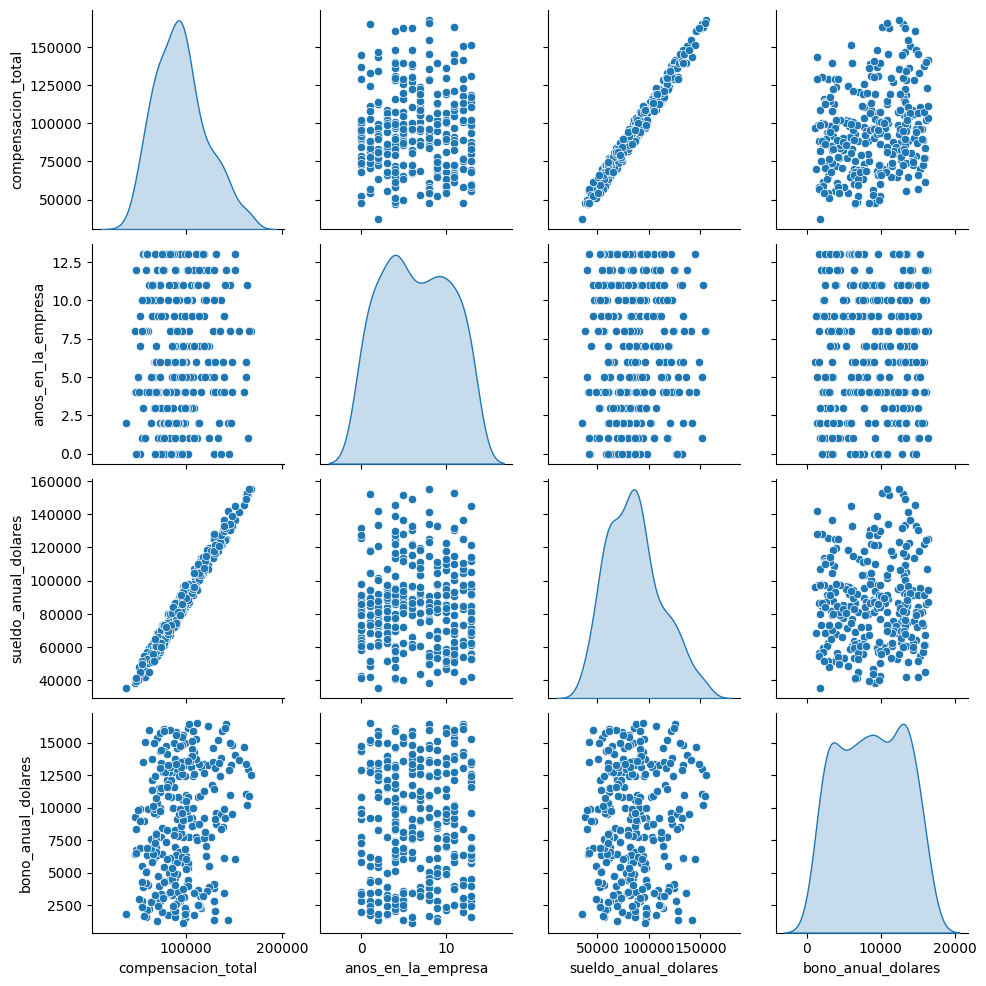

In [11]:
# ── Ejercicio ────────────────────────────────────────────────────────────
# 1. Genera un *pairplot* con Seaborn para las cuatro variables numéricas
#    seleccionadas: compensación total, años en la empresa, salario anual
#    y bono anual.
# 2. En cada parte inferior de la matriz verás un scatter: relación
#    bivariada entre pares de variables.
# 3. En la diagonal (`diag_kind='kde'`) se dibuja la densidad KDE de cada
#    variable (en lugar de un histograma) para que la forma de la
#    distribución sea más suave.
# 4. Este gráfico permite detectar de un vistazo correlaciones lineales,
#    clusters y outliers entre todas las combinaciones de variables.

sns.pairplot(df_salarios_pais[['compensacion_total', 'anos_en_la_empresa', 'sueldo_anual_dolares','bono_anual_dolares' ]], diag_kind='kde')
plt.show

---
## 6 🎨 Buenas prácticas al graficar con Matplotlib / Seaborn

### 1 · Anatomía de una figura

	•	Figure – el lienzo general; puede contener uno o varios ejes.
	•	Axes – área donde se dibuja un gráfico individual (subplots).
	•	Axis – los ejes x y y dentro de cada Axes.
	•	Título, etiquetas, leyenda, grid – elementos que añaden contexto.

👉 Regla de oro: ajusta cada elemento conscientemente; evita configuraciones por defecto si dificultan la lectura.

### 🕒 ¿Cuándo usar este patrón?
*	Serie temporal: temperatura vs tiempo, ventas diarias, etc.
*	Función matemática: visualizar forma y ruido de una ecuación.
*	Demostración de principios: explicar ruido estadístico o suavizado.

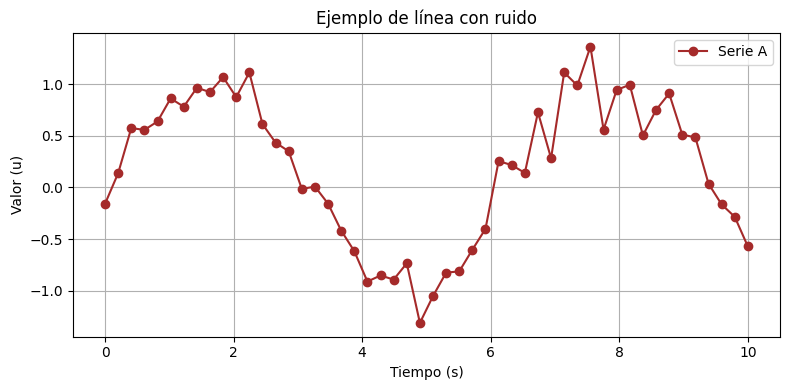

In [14]:
# Ejemplo de datos
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(0, .2, size=len(x))

# 1) Crea figura y eje
fig, ax = plt.subplots(figsize=(8, 4))

# 2) Grafica en ese eje
ax.plot(x, y, marker='o', linestyle='-', color='brown', label='Serie A')

# 3) Personaliza
ax.set_title('Ejemplo de línea con ruido')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Valor (u)')
ax.legend()
ax.grid(True)
ax.legend()
plt.tight_layout();           
plt.show()

**🗂️ ¿Cuándo usar subplots lado a lado?**

- Cuando necesitas **comparar dos vistas** de la misma variable (p. ej. distribución vs evolución temporal) sin ocupar varias figuras.
- Para **reportes o dashboards**: ahorras espacio y mantienes la narrativa en una sola imagen.
- Ideal en el EDA para ver la **forma global** (histograma) y el **comportamiento secuencial** (línea temporal) al mismo tiempo.

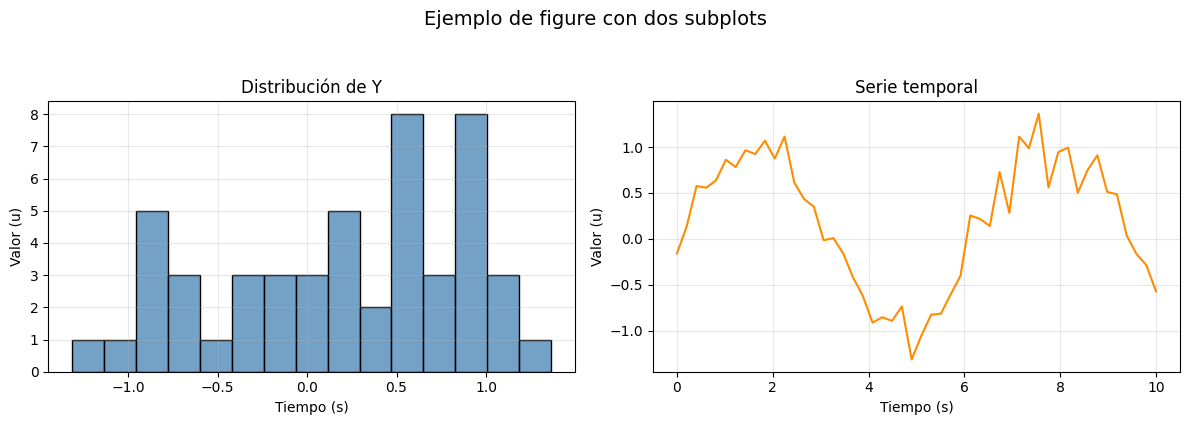

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histograma
sns.histplot(y, bins=15, ax=axs[0], color='steelblue')
axs[0].set_title('Distribución de Y')

# Serie temporal
axs[1].plot(x, y, color='darkorange')
axs[1].set_title('Serie temporal')

for ax in axs:
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Valor (u)')
    ax.grid(alpha=0.3)

plt.suptitle('Ejemplo de figure con dos subplots', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**🔵 ¿Cuándo usar este tipo de scatterplot múltiple?**

- Para visualizar la **relación entre dos variables numéricas** (`total_bill` vs `tip`) mientras se **segmenta por dos factores categóricos**:
  - Color (`hue="sex"`) diferencia hombres y mujeres.
  - Marcador (`style="smoker"`) distingue fumadores de no fumadores.

Útil cuando quieres detectar patrones o diferencias en grupos combinando tanto color como forma en un solo gráfico, manteniendo la leyenda fuera del área de datos para no tapar puntos.

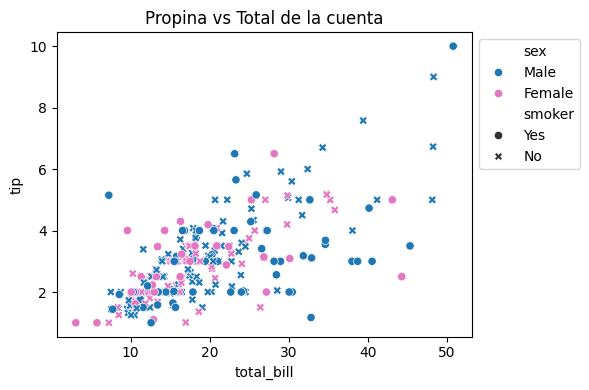

In [16]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=tips, x="total_bill", y="tip",
                hue="sex", style="smoker",
                palette={"Male": "#1f77b4", "Female": "#e377c2"},
                ax=ax)

ax.set_title('Propina vs Total de la cuenta')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))  # fuera del plot
plt.tight_layout()
plt.show()

✅ Checklist de buenas prácticas
1.	Define figura y ejes explícitos (fig, ax)
2.	Ajusta título, ejes y unidades; no dejes “Total” sin aclarar qué es.
3.	Coloca la leyenda fuera si estorba los datos.
4.	Elige colores accesibles y consistentes.
5.	Usa tight_layout() o constrained_layout=True para evitar cortes.
6.	Exporta en alta resolución (dpi=300) si lo usarás en informes impresos.
7.	Simplifica: quita elementos innecesarios y deja que la historia resalte.

---
## 7 · Conclusiones del Módulo 3
- Seleccionamos el gráfico según la variable y la pregunta.
- Detectamos outliers y correlaciones para orientar análisis futuros.
- Comunicar insights con visualizaciones claras es tan importante como el cálculo en sí.

➡️ Próximo módulo: **responder preguntas de negocio** usando las transformaciones y visualizaciones aprendidas.
